Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the dataset 

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Understanding the data 

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note: Most of the features are of onject type , even feature like TotalCharges are object which is supposed to be float . This is most likely due to whitespaces and there is no need of customerID for the further analysis and model building 

In [5]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows where TotalCharges couldn't be converted
print("Missing values in TotalCharges:", df['TotalCharges'].isna().sum())
df = df.dropna(subset=['TotalCharges'])

# Reset index after drop
df.reset_index(drop=True, inplace=True)

Missing values in TotalCharges: 11


In [6]:
df.drop('customerID', axis=1, inplace=True)


In [7]:
#checking missing values
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(22)

In [9]:
df.drop_duplicates(inplace=True)



In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388
std,0.369180,24.520441,30.064769,2266.820832
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,56.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


Summary:
- TotalCharges=tenure*MonthlyCharges
- tenure ranges from 1 to 72 months
- MonthlyCharges range from $18.25 to $118.75
- On avg. typical customers has been with the company ~32 months, pays around $65/month, and has spent about $2,200 in total.

Checking the Target Variable:

 This section includes the checking of target variale which is Churn to see how the churn value distribution looks like.


In [11]:
df['Churn'].value_counts()


Churn
No     5153
Yes    1857
Name: count, dtype: int64

In [12]:
df['Churn'].value_counts()/len(df)*100

Churn
No     73.509272
Yes    26.490728
Name: count, dtype: float64

Univariate Analysis

Churn by gender 

In [13]:
df[['Churn', 'gender']].value_counts().unstack()

gender,Female,Male
Churn,,
No,2541,2612
Yes,934,923


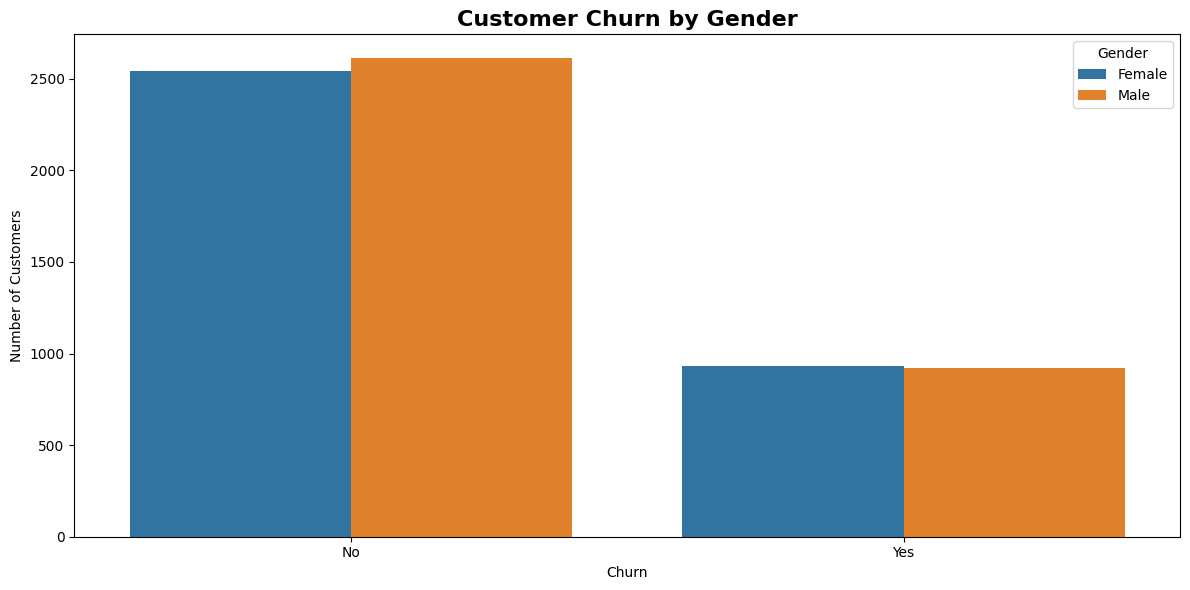

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Churn', hue='gender', data=df)
plt.title('Customer Churn by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Observation:
- Churn rate seems similar among the both gender
- So, gender alone isn't that strong feature for prediction 

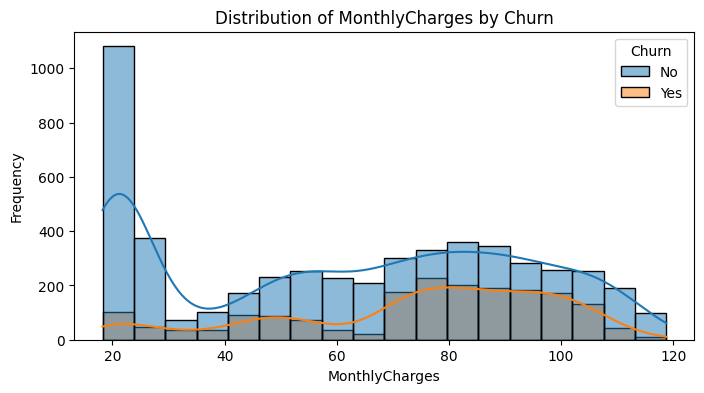

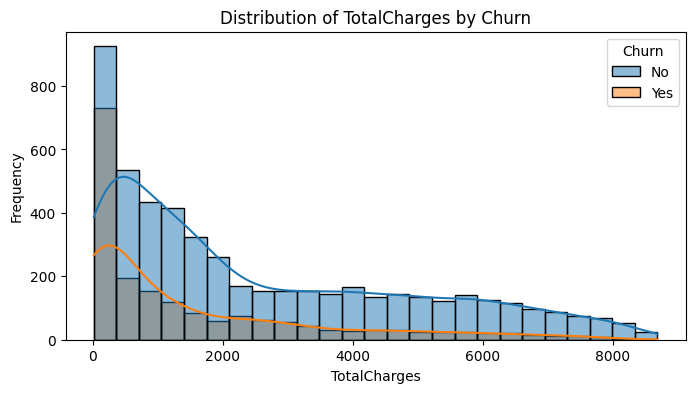

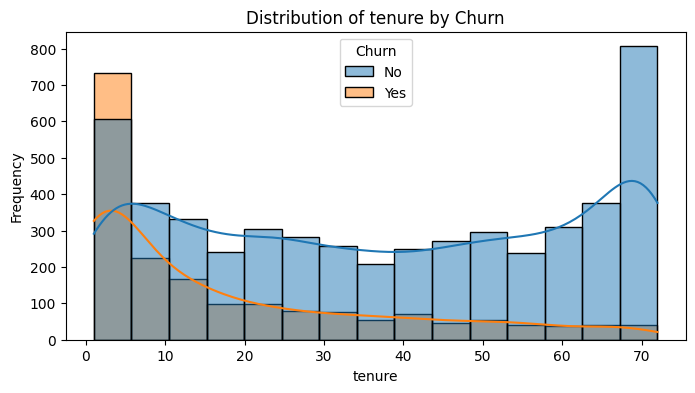

In [15]:
# Distribution of numerical features by churn
numerical_features = ['MonthlyCharges', 'TotalCharges','tenure']
for col in numerical_features:
  plt.figure(figsize=(8, 4))
  sns.histplot(data=df, x=col, hue='Churn', kde=True)
  plt.title(f'Distribution of {col} by Churn')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

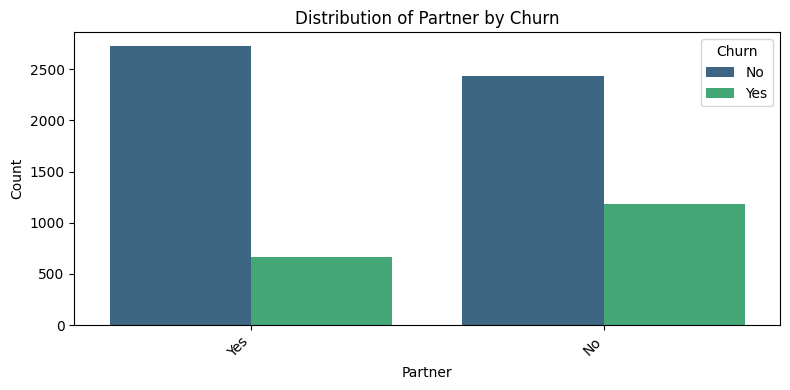

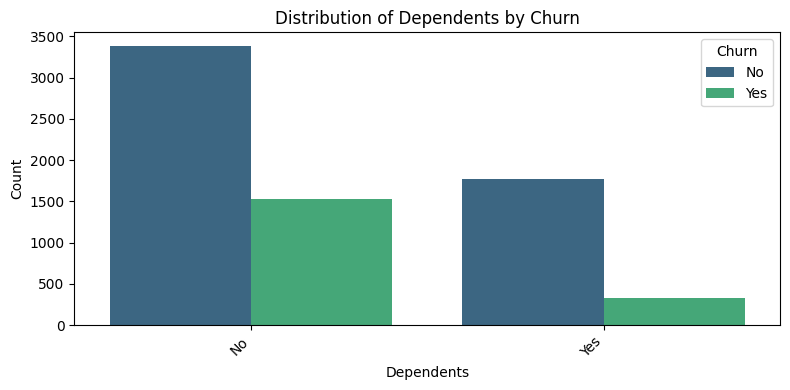

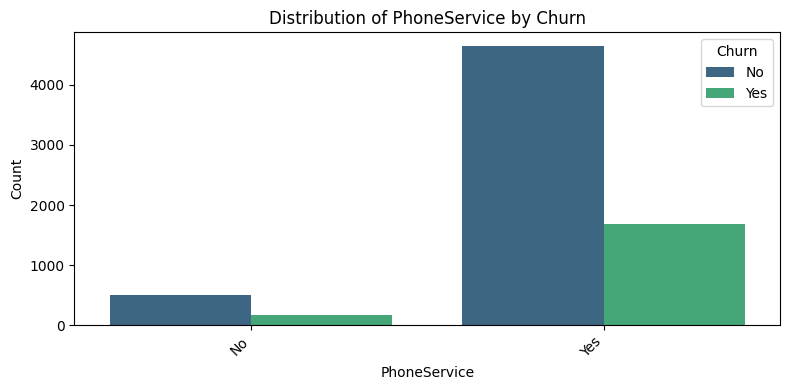

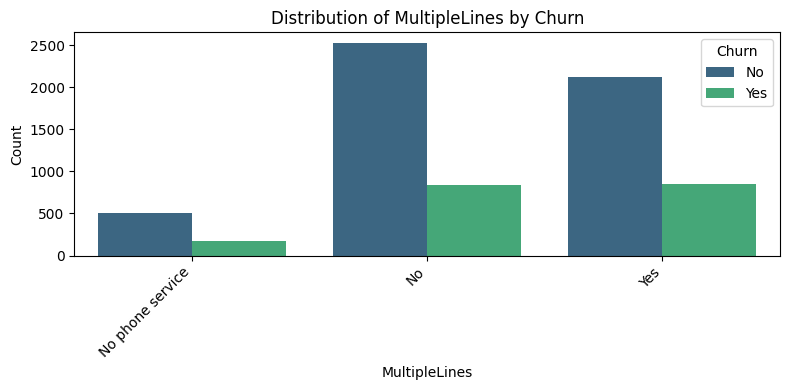

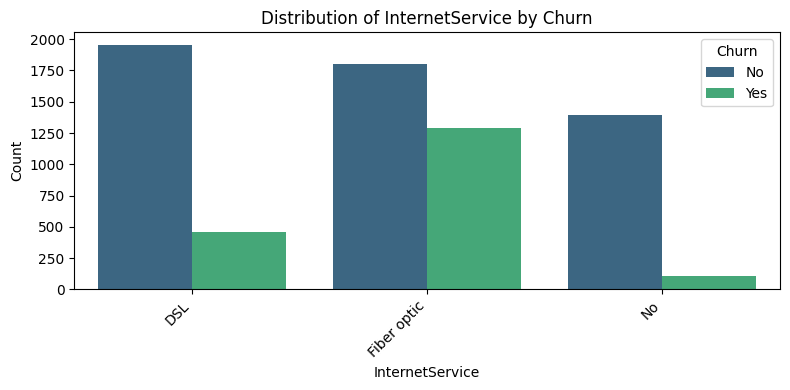

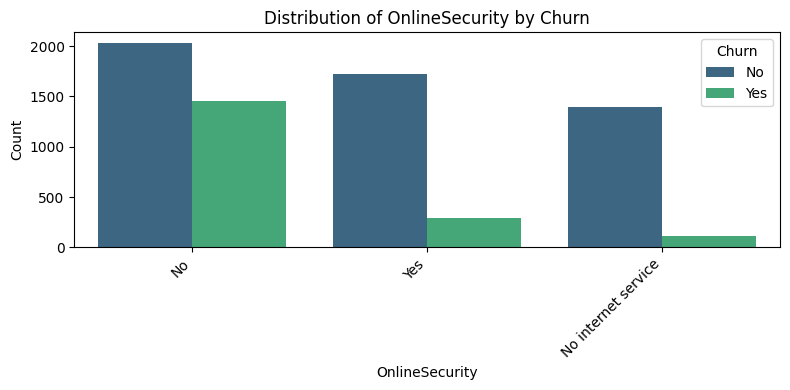

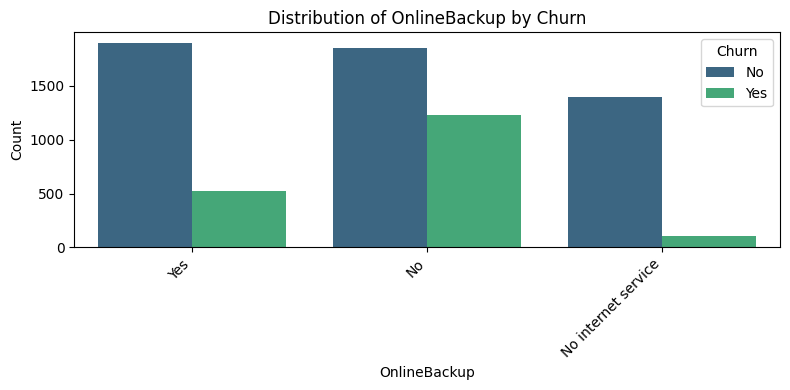

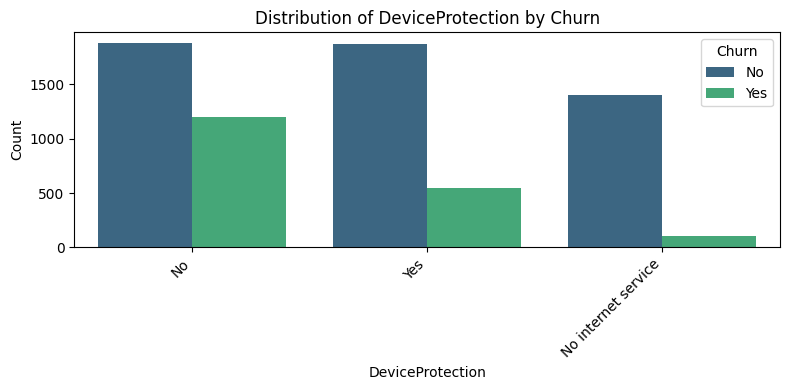

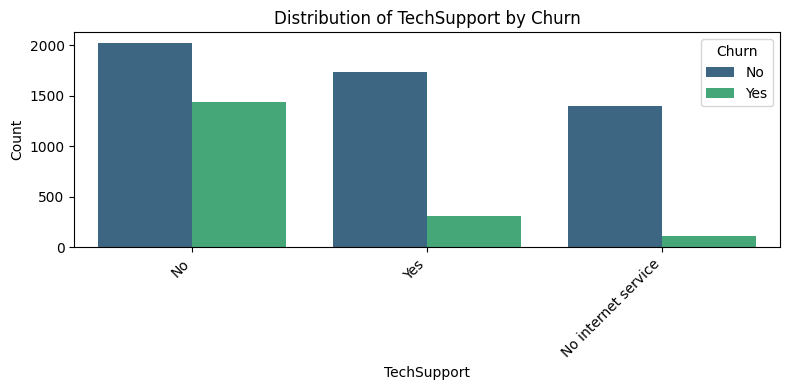

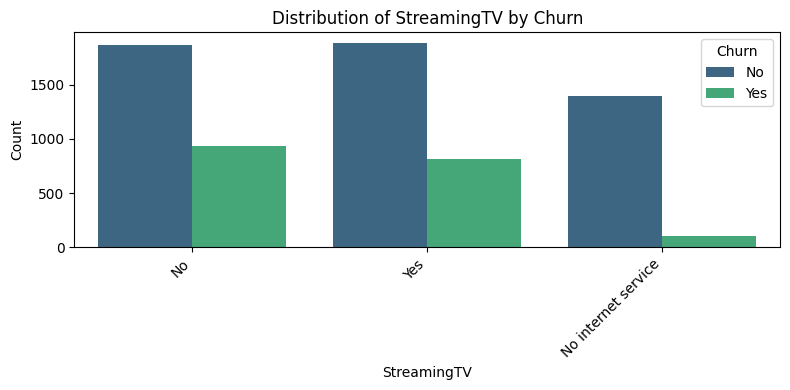

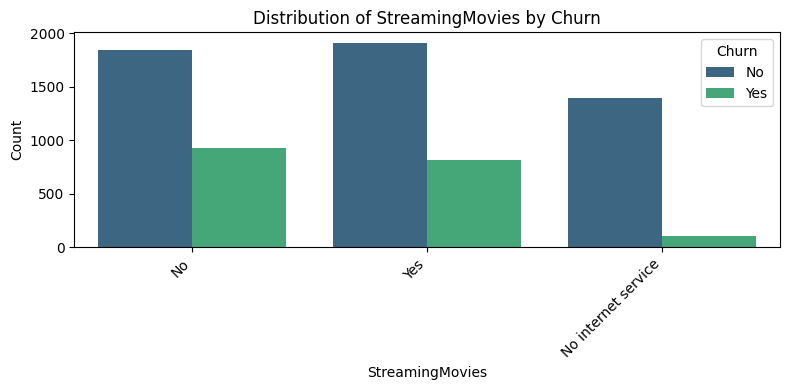

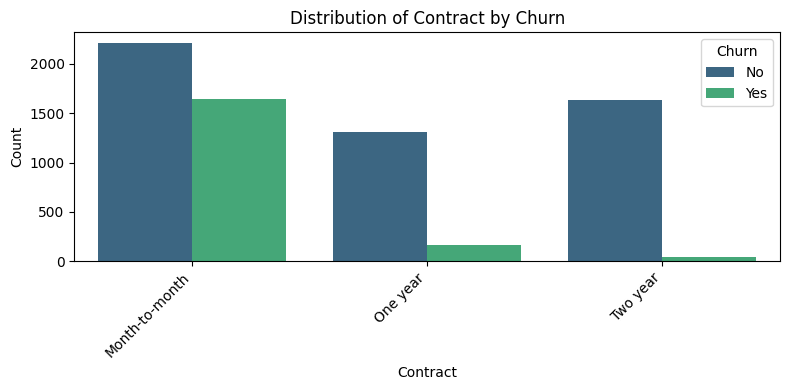

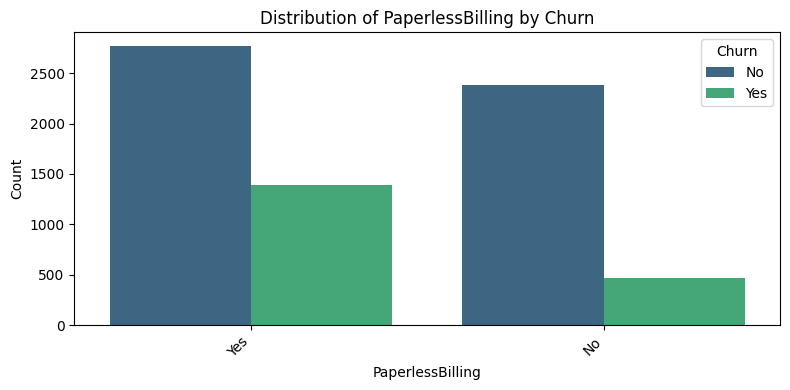

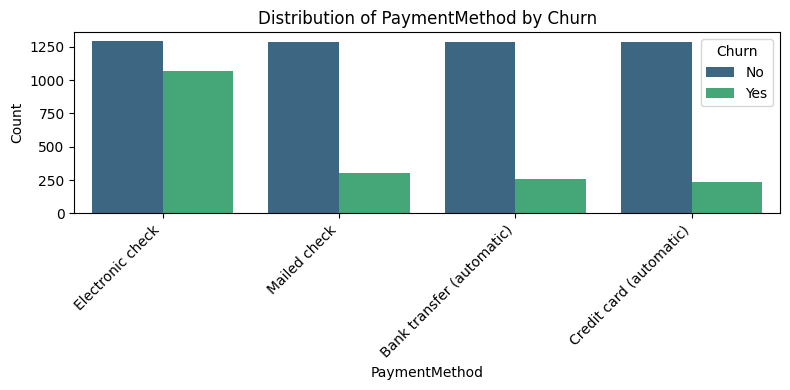

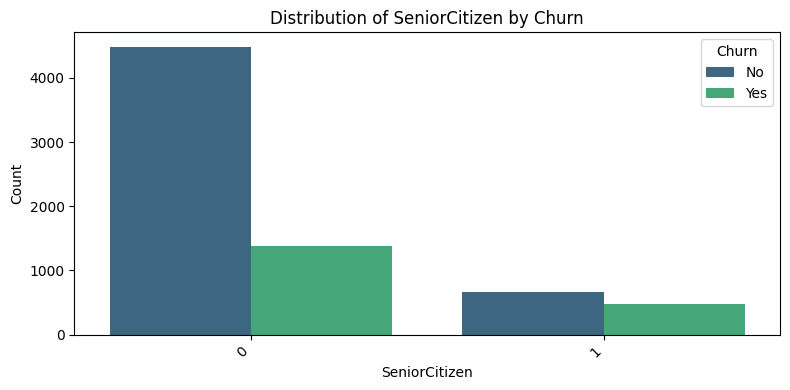

In [16]:
# Distribution of categorical features by churn
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('Churn')
categorical_features.remove('gender')
categorical_features.append('SeniorCitizen')

for col in categorical_features:
  plt.figure(figsize=(8, 4))
  sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
  plt.title(f'Distribution of {col} by Churn')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

Summary of Key Insights:

- Churn rate seems to depends on Monthlycharges as churned people tends to pay high
- Gender have little infulence in churn
- Contract type has a strong relationship with churn as shorter contracts result in more churn.
- Shorter tenures are associated with high churn
- From payment method with electronic checks have hihg churn

Feature Engineering

Now we have explored and understand the dataset and the key drivers of the of target.

Here, we will perform data preprocessing which includes :
- Dropping the irrelevant cols
- encoding the categorical variable
- Scaling the numeric features 


In [17]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Now get correlation
df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.194008
SeniorCitizen     0.151270
TotalCharges     -0.198362
tenure           -0.353339
Name: Churn, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
df['tenure'] = mms.fit_transform(df[['tenure']])
df['MonthlyCharges'] = mms.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = mms.fit_transform(df[['TotalCharges']])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.115423,0.001275,0
1,Male,0,No,No,0.464789,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.385075,0.215867,0
2,Male,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.354229,0.010310,1
3,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.239303,0.210241,0
4,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.521891,0.015330,1


Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

So, tenure, MonthlyCharges and TotalCharges features are normalized as they displayed a right skewed and bimodal data distribution.

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


Correlation Matrix:

<Axes: >

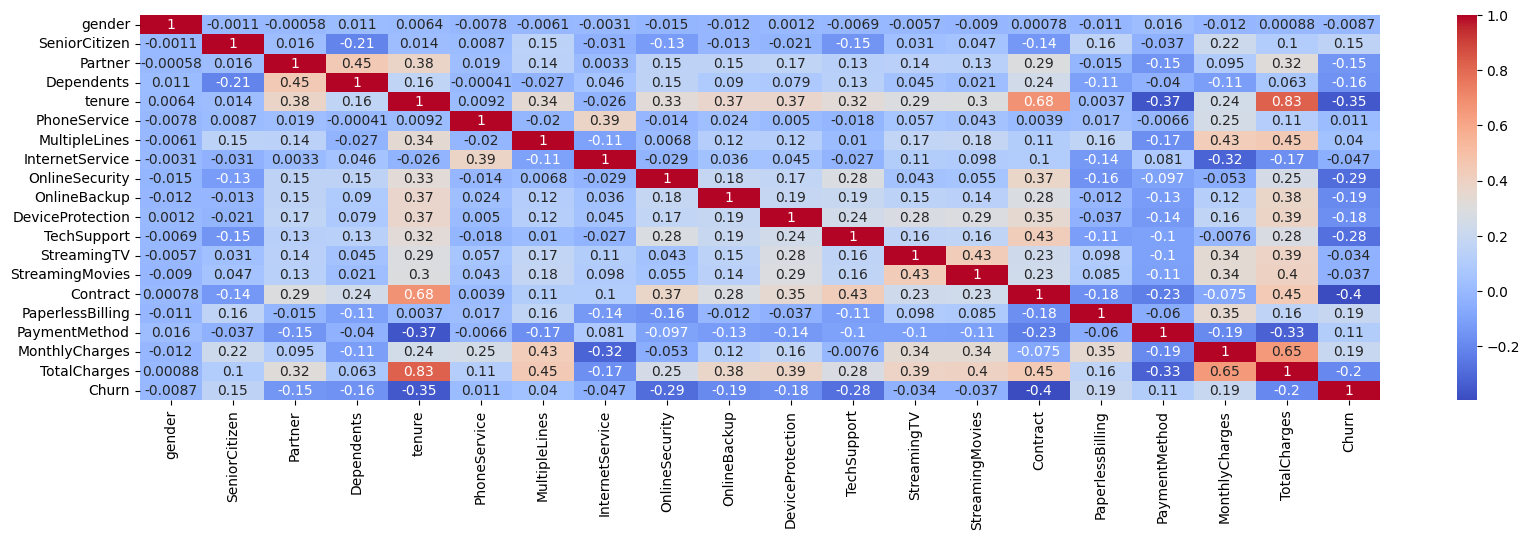

In [20]:
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


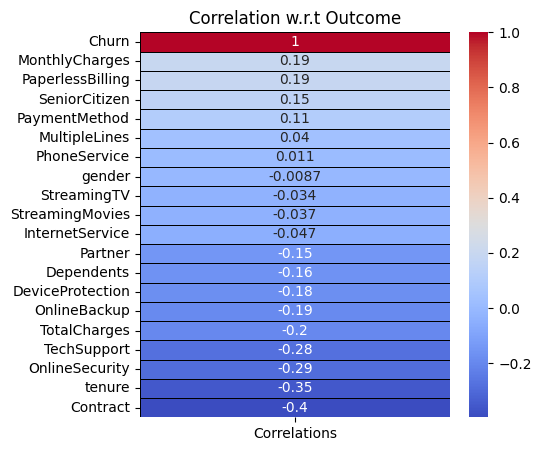

In [21]:
corr = df.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService does not display any kind of correlation. We will drop the features with correlation coefficient between (-0.1,0.1).

Remaining features either display a significant positive or negative correlation.

In [22]:
df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0.000000,0,2,0,0,0,1,2,0.115423,0.001275,0
1,0,0,0,0.464789,2,0,2,0,1,0,3,0.385075,0.215867,0
2,0,0,0,0.014085,2,2,0,0,0,1,3,0.354229,0.010310,1
3,0,0,0,0.619718,2,0,2,2,1,0,0,0.239303,0.210241,0
4,0,0,0,0.014085,0,0,0,0,0,1,2,0.521891,0.015330,1


Data Balancing :

As the given dataset is imbalanced ,so we need to solve this issue as models can be biased due to this. Thus , this is solved using SMOTE analysis 

In [23]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [24]:
over = SMOTE(sampling_strategy = 1)

f1 = df.iloc[:,:13].values
t1 = df.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({np.int64(0): 5153, np.int64(1): 5153})

Modeling 


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [26]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [27]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

XGBoost Classifier

In [28]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

Cross Validation Score :  90.26%
ROC_AUC Score :  82.90%


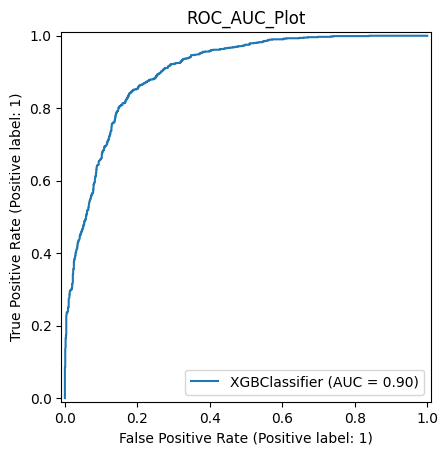

In [29]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1051
           1       0.80      0.86      0.83      1011

    accuracy                           0.83      2062
   macro avg       0.83      0.83      0.83      2062
weighted avg       0.83      0.83      0.83      2062



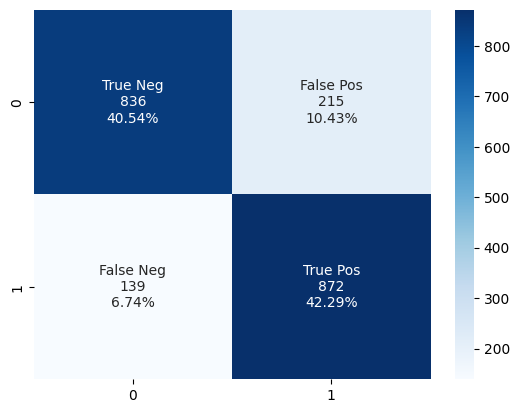

In [30]:
model_evaluation(classifier_xgb,x_test,y_test)


LightGBM Classifier

In [46]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=1000,
    verbose=-1,            # disables LightGBM logs and warnings
    min_gain_to_split=0.0  # optional: prevents "no further splits" warning
)


Cross Validation Score :  90.46%
ROC_AUC Score :  82.84%


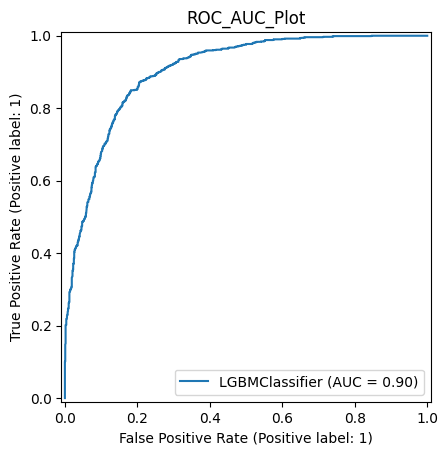

In [47]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1051
           1       0.80      0.86      0.83      1011

    accuracy                           0.83      2062
   macro avg       0.83      0.83      0.83      2062
weighted avg       0.83      0.83      0.83      2062



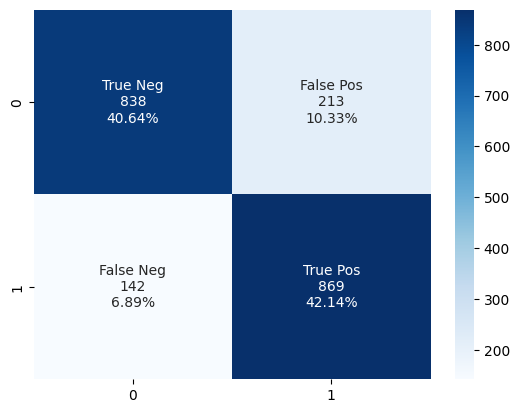

In [48]:
model_evaluation(classifier_lgbm,x_test,y_test)

RandomForest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Cross Validation Score :  85.88%
ROC_AUC Score :  77.24%


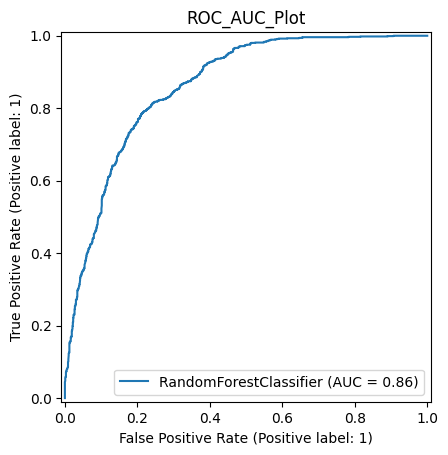

In [51]:
model(classifier_rf,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1051
           1       0.73      0.84      0.78      1011

    accuracy                           0.77      2062
   macro avg       0.78      0.77      0.77      2062
weighted avg       0.78      0.77      0.77      2062



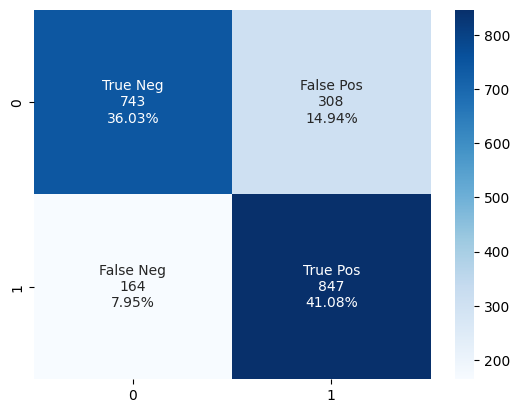

In [52]:
model_evaluation(classifier_rf,x_test,y_test)

DecisionTree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Cross Validation Score :  84.42%
ROC_AUC Score :  77.74%


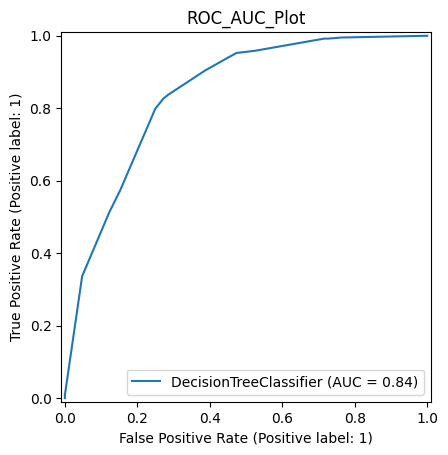

In [55]:
model(classifier_dt,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1051
           1       0.75      0.83      0.78      1011

    accuracy                           0.78      2062
   macro avg       0.78      0.78      0.78      2062
weighted avg       0.78      0.78      0.78      2062



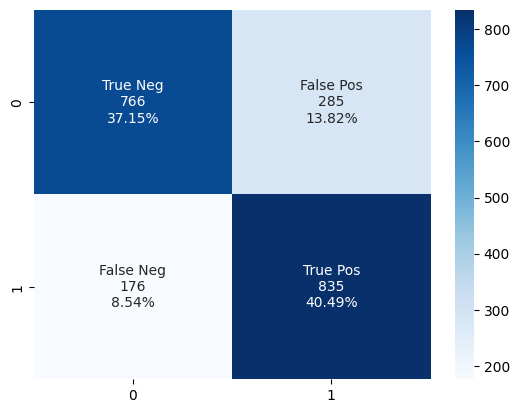

In [56]:
model_evaluation(classifier_dt,x_test,y_test)

Stack of XGBClassifier, LightGBMClassifier, Random Forest Classifer & Decision Tree Classifier

In [57]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt)],
                           final_estimator = classifier_lgbm)


Cross Validation Score :  91.10%
ROC_AUC Score :  83.26%


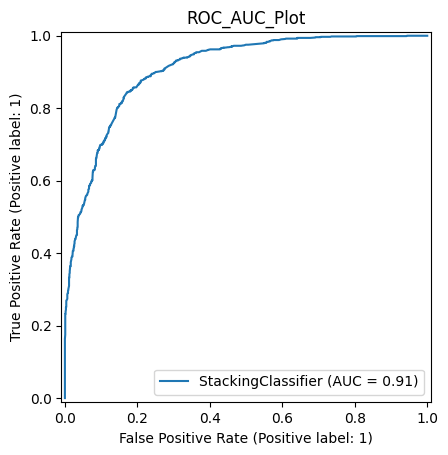

In [58]:
model(stack,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1051
           1       0.81      0.85      0.83      1011

    accuracy                           0.83      2062
   macro avg       0.83      0.83      0.83      2062
weighted avg       0.83      0.83      0.83      2062



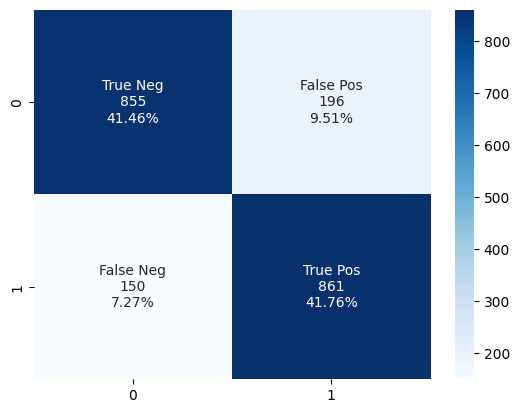

In [59]:
model_evaluation(stack,x_test,y_test)